# Clase 9.1 Regresion lineal simple, multiple

In [1]:
%ls datasets

 adult.csv                     Canada.xlsx         mic.xlsx
 airline_data.csv              Cartwheeldata.csv   movies.csv
 antropometria00.csv           census.csv          nhanes_2015_2016.csv
 antropometria-dataset-1.csv   coches.csv          pokemon.csv
 antropometria-dataset.csv     cwurData.csv        reg_data.csv
'base de datos 2.csv'          data.csv            sample_pivot.csv
'base de datos.xlsx'           headbrain.csv       tips.csv
 Book3.csv                     mic2.xlsx           weight-height.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('datasets/reg_data.csv')
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master
5,Female,1700,42,Washington,60.0,Ford,Master
6,Male,3000,50,Washington,77.0,Ford,No
7,Male,3000,55,Washington,77.0,Ford,Bachelor
8,Female,2800,31,New York,87.0,Ford,Bachelor
9,Male,2900,46,New York,70.0,GM,Master


# Pregunta 1:
## Cual es el impacto de age en salary 
### Salary = b0 + b1*age

In [4]:
#pip install statsmodels 

In [5]:
#pip install seaborn

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 
import numpy as np
from sklearn import linear_model

In [8]:
modelA = sm.OLS.from_formula('Salary~Age', data = df )
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0326
Time:                        13:31:46   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observaciones:
* Variable dependiente: Salary
* Variable independiente: Age
* R-Square : 0.380; por lo tanto,modelo no es eficiente, no es confiable

* Df model: 1
* Intercept > 0.05; no es significativo

Salary = 349.4458 + 48.0932*Age

* P> T ; mayor a 0.05 no es significativo 

In [12]:
print('Salary of a person whose age is 33 :\t' , 349.4458 + 48.0932*33)

df.iloc[:2,:]

Salary of a person whose age is 33 :	 1936.5214


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No


In [15]:
print('Diferencia es :\t', 1500-1936.5214)
print('Diferencia es :\t', 1200-1936.5214)

resultA.resid

Diferencia es :	 -436.5214000000001
Diferencia es :	 -736.5214000000001


0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

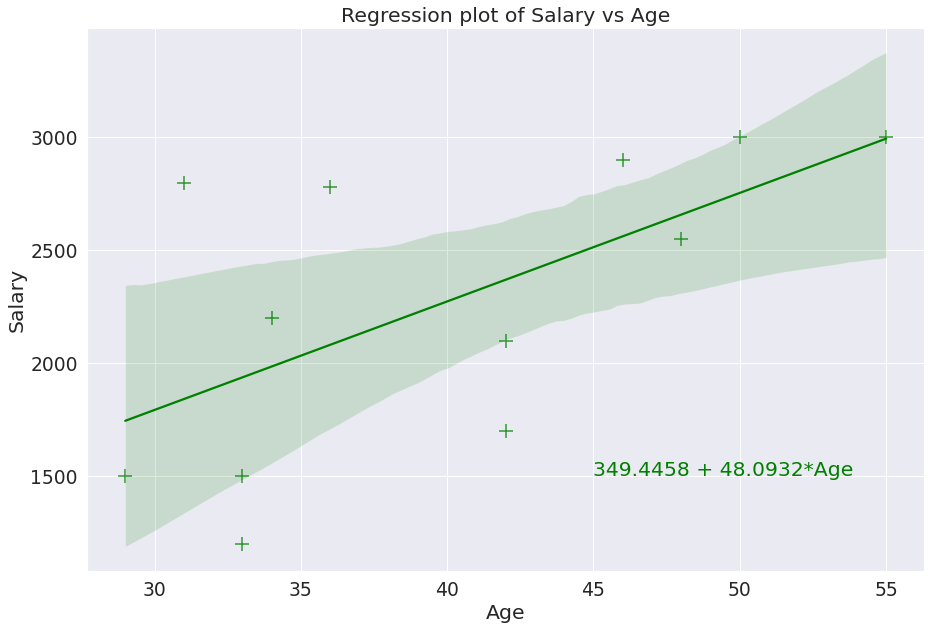

In [33]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.7)

reg_plot = sns.regplot(x = 'Age',
            y = 'Salary',
            data = df,
           marker = '+',
           color = 'green', 
            scatter_kws = {'s':200}
           )

reg_plot.set_title('Regression plot of Salary vs Age')
reg_plot.text(45 ,1500, '349.4458 + 48.0932*Age',
             color = 'green', 
             size = 'medium')
plt.show()

In [35]:
RESIA = resultA.resid
RESIA

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

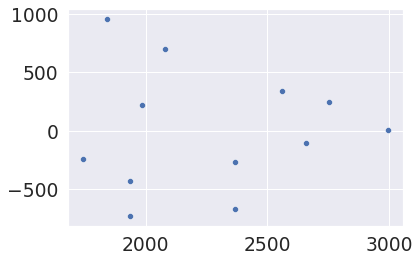

In [36]:
resi_plot = sns.scatterplot(x = resultA.fittedvalues, 
                            y = RESIA)

## Conclusion
# dependientes, residuales normale 

# Pregunta 2:
## Cual es el impacto de age, gender en salary 
### Salary = b0 + b1*age + b2*Gender

In [48]:
modelB = sm.OLS.from_formula('Salary~Age + Gender', data = df )
resultB = modelB.fit()
resultB.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0945
Time:                        14:22:13   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observaciones:
* Variable dependiente: Salary
* Variable independiente: Age , Gender
* R-Square : 0.408; por lo tanto,modelo no es eficiente, no es confiable

* Df model: 2
* Intercept > 0.05; no es significativo

`Salary = 749.8157 + 34.2211*Age + 306.7169*Gender_Male

* P> T ; mayor a 0.05 no es significativo 

### Case Study:
Df Model = 2 

#### Caso 1:
* Age = 33
* Male = True 

In [43]:
print('Salary de una persona con Age 33, Male \t:', 
      749.8157 + 34.2211*33 + 306.7169*1)

Salary de una perosna con Age 33, Male 	: 2185.8289


#### Caso 2:
* Age = 33
* Male = False 

In [45]:
print('Salary de una persona con Age 33, Female \t:', 
      749.8157 + 34.2211*33 + 306.7169*0)

df.iloc[:2,:]

Salary de una persona con Age 33, Female 	: 1879.112


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No


In [49]:
print('Diferencia es :\t', 1500-1879.112)
print('Diferencia es :\t', 1200-1879.112)

resultB.resid

Diferencia es :	 -379.1120000000001
Diferencia es :	 -679.1120000000001


0    -379.112228
1    -679.112228
2     -20.050251
3    -393.819095
4    -242.227806
5    -487.102178
6     232.412060
7      61.306533
8     989.329983
9     269.296482
10    798.224456
11   -149.145729
dtype: float64

# Pregunta 3:
## Cual es el impacto de age, gender, academic_degree en salary 
### Salary = b0 + b1*age + b2*Gender + b3*academic_degree

In [50]:
modelC = sm.OLS.from_formula('Salary~Age + Gender + Academic_degree', data = df )
resultC = modelC.fit()
resultC.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.636
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.267
Time:                        14:24:14   Log-Likelihood:                -90.426
No. Observations:                  12   AIC:                             190.9
Df Residuals:                       7   BIC:                             193.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   815.5485   1086.544      0.751      0.477   -1753.721    3384.818
Gender[T.Male]              336.1028    521.798      0.644      0.540    -897.752    1569.958
Academic_degree[T.Master]  -373.1962    404.490     -0.923      0.387   -1329.664     583.271
Academic_degree[T.No]       -43.8495    470.054     -0.093      0.928   -1155.350    1067.651
Age                          36.3765     31.992      1.137      0.293     -39.272     112.025
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.427
Skew:                           0.379   Prob(JB):                        0.808
Kurtosis:                       2.472   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observaciones:
* Variable dependiente: Salary
* Variable independiente: Age , Gender, Academic_Degree
* R-Square : 0.483; por lo tanto,modelo no es eficiente, no es confiable

* Df model: 4
* Intercept > 0.05; no es significativo

`Salary = 815.5485 + 36.3765*Age + 336.1028*Gender_Male -373.1962*AcademicDegree_Master - 43.8495*AcademicDegree_No

* P> T ; mayor a 0.05 no es significativo 

### Case Study:
Df Model = 2 

#### Caso 1:
* Age = 48
* Male = True 
* Master Academic Degree = True 
* No Academic Degree = False

In [57]:
print('Salary de una persona con Age 33, Male, Con Master Academic Degree \t:', 
      815.5485 + 36.3765*48 + 336.1028*1 -373.1962*1 - 43.8495*0)
df.iloc[-1,:]

Salary de una persona con Age 33, Male, Con Master Academic Degree 	: 2524.5271000000002


Gender                 Male
Salary                 2550
Age                      48
Place              New York
Weight                   64
Company                  GM
Academic_degree      Master
Name: 11, dtype: object

#### Caso 2:
* Age = 33
* Male = False 
* Master Academic Degree = False 
* No Academic Degree = True

In [55]:
print('Salary de una persona con Age 33, Female con Ninguna Master Degree \t:', 
      815.5485 + 36.3765*33 + 336.1028*0 -373.1962*0 - 43.8495*1)
df.iloc[:2,:]

Salary de una persona con Age 33, Female con Ninguna Master Degree 	: 1972.1235


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No


In [58]:
resultC.resid

0    -515.972096
1    -772.122563
2    -188.451404
3    -206.267018
4       2.729975
5    -270.164184
6      73.374548
7    -152.357353
8     856.780852
9     448.227087
10    698.748015
11     25.474139
dtype: float64

# Pregunta 4:
## Cual es el impacto de gender, academic_degree en salary 
### Salary = b0 + b1*Gender + b1*academic_degree

In [63]:
modelD = sm.OLS.from_formula('Salary ~ Gender + Academic_degree', data = df )
resultD = modelD.fit()
resultD.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     1.689
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.246
Time:                        14:41:40   Log-Likelihood:                -91.443
No. Observations:                  12   AIC:                             190.9
Df Residuals:                       8   BIC:                             192.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1987.2093    350.913      5.663      0.000    1178.002    2796.416
Gender[T.Male]              775.5814    356.912      2.173      0.062     -47.459    1598.622
Academic_degree[T.Master]  -302.5581    406.942     -0.743      0.478   -1240.969     635.853
Academic_degree[T.No]        80.9302    465.356      0.174      0.866    -992.184    1154.044
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.426
Skew:                          -0.000   Prob(JB):                        0.808
Kurtosis:                       2.077   Cond. No.                         4.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observaciones:
* Variable dependiente: Salary
* Variable independiente:  Gender, Academic_Degree
* R-Square : 0.483; por lo tanto,modelo no es eficiente, no es confiable

* Df model: 3
* Intercept > 0.05; no es significativo

`Salary = 1987.2093 + 775.5814*Gender_Male -302.5581*AcademicDegree_Master + 80.9302*AcademicDegree_No

* P> T ; mayor a 0.05 no es significativo 

### Case Study:
Df Model = 2 

#### Caso 1:
* Male = True 
* Master Academic Degree = True 
* No Academic Degree = False

In [68]:
print('Salary de una persona Male, Con Master Academic Degree \t:', 
      1987.2093 + 775.5814*1 -302.5581*1 + 80.9302*0)
df.iloc[-1,:]

Salary de una persona Male, Con Master Academic Degree 	: 2460.2326


Gender                 Male
Salary                 2550
Age                      48
Place              New York
Weight                   64
Company                  GM
Academic_degree      Master
Name: 11, dtype: object

#### Caso 2:
* Age = 33
* Male = False 
* Master Academic Degree = False 
* No Academic Degree = True

In [67]:
print('Salary de una persona Female con Ninguna Master Degree \t:', 
      1987.2093 + 775.5814*0 -302.5581*0 + 80.9302*1)
df.iloc[:2,:]

Salary de una persona Female con Ninguna Master Degree 	: 2068.1394999999998


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
